In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json
import os
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import clear_output
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


plt.rcParams['figure.figsize']=[18,8]
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
#!pip install pandasql

In [3]:
import pandasql as psql

In [4]:
df=pd.read_csv('bundesliga.csv')

In [5]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,D1,7/8/09,Wolfsburg,Stuttgart,2,0,H,0,0,D,...,2.24,19.0,0.00,1.45,1.43,2.89,2.67,NaN,NaN,NaN
1,D1,8/8/09,Dortmund,FC Koln,1,0,H,0,0,D,...,2.02,17.0,-0.75,1.86,1.83,2.08,2.05,NaN,NaN,NaN
2,D1,8/8/09,Hertha,Hannover,1,0,H,0,0,D,...,1.94,16.0,0.00,1.33,1.31,3.35,3.19,NaN,NaN,NaN
3,D1,8/8/09,Hoffenheim,Bayern Munich,1,1,D,1,1,D,...,2.14,17.0,0.50,1.93,1.91,2.02,1.99,NaN,NaN,NaN
4,D1,8/8/09,Mainz,Leverkusen,2,2,D,1,2,A,...,2.12,17.0,0.00,2.74,2.52,1.55,1.46,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,D1,18/5/19,Mainz,Hoffenheim,4,2,H,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3056,D1,18/5/19,M'gladbach,Dortmund,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3057,D1,18/5/19,Schalke 04,Stuttgart,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,D1,18/5/19,Werder Bremen,RB Leipzig,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'GBH',
       'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD',
       'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72'],
      dtype='object')

In [7]:

df = df[['Date', 'HomeTeam',  'AwayTeam', 'HS', 'AS', 'HST', 'AST', 'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]


In [8]:
df

,Date,HomeTeam,AwayTeam,HS,AS,HST,AST,HTHG,HTAG,HTR,...,FTAG,FTR,HC,AC,HF,AF,HY,AY,HR,AR
0,7/8/09,Wolfsburg,Stuttgart,13,14,7,4,0,0,D,...,0,H,6,3,12,12,0,0,0,0
1,8/8/09,Dortmund,FC Koln,24,7,11,0,0,0,D,...,0,H,16,1,8,10,0,1,0,0
2,8/8/09,Hertha,Hannover,10,15,4,3,0,0,D,...,0,H,5,3,16,20,3,2,0,0
3,8/8/09,Hoffenheim,Bayern Munich,9,9,1,3,1,1,D,...,1,D,3,10,10,28,0,2,0,0
4,8/8/09,Mainz,Leverkusen,8,13,4,7,1,2,A,...,2,D,3,5,22,28,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,18/5/19,Mainz,Hoffenheim,22,19,12,7,0,2,A,...,2,H,8,5,17,9,2,4,0,1
3056,18/5/19,M'gladbach,Dortmund,7,12,0,3,0,1,A,...,2,A,2,2,8,6,1,1,0,0
3057,18/5/19,Schalke 04,Stuttgart,12,16,3,8,0,0,D,...,0,D,7,5,10,8,0,1,0,0
3058,18/5/19,Werder Bremen,RB Leipzig,6,10,3,3,1,0,H,...,1,H,3,9,16,12,2,2,0,0


In [9]:
df['HomeTeam'].unique()

array(['Wolfsburg', 'Dortmund', 'Hertha', 'Hoffenheim', 'Mainz',
       'Nurnberg', 'Werder Bremen', 'Bochum', 'Freiburg', 'Bayern Munich',
       'Ein Frankfurt', 'FC Koln', 'Hamburg', 'Hannover', 'Leverkusen',
       'Stuttgart', "M'gladbach", 'Schalke 04', 'Kaiserslautern',
       'St Pauli', 'Augsburg', 'Greuther Furth', 'Fortuna Dusseldorf',
       'Braunschweig', 'Paderborn', 'Darmstadt', 'Ingolstadt',
       'RB Leipzig'], dtype=object)

In [10]:
df['AwayTeam'].unique()

array(['Stuttgart', 'FC Koln', 'Hannover', 'Bayern Munich', 'Leverkusen',
       'Schalke 04', 'Ein Frankfurt', "M'gladbach", 'Hamburg',
       'Werder Bremen', 'Nurnberg', 'Wolfsburg', 'Dortmund', 'Mainz',
       'Hoffenheim', 'Freiburg', 'Hertha', 'Bochum', 'Kaiserslautern',
       'St Pauli', 'Augsburg', 'Fortuna Dusseldorf', 'Greuther Furth',
       'Braunschweig', 'Paderborn', 'Ingolstadt', 'Darmstadt',
       'RB Leipzig'], dtype=object)

In [11]:
df.head()
df.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
HS          0
AS          0
HST         0
AST         0
HTHG        0
HTAG        0
HTR         0
FTHG        0
FTAG        0
FTR         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [12]:
df

,Date,HomeTeam,AwayTeam,HS,AS,HST,AST,HTHG,HTAG,HTR,...,FTAG,FTR,HC,AC,HF,AF,HY,AY,HR,AR
0,7/8/09,Wolfsburg,Stuttgart,13,14,7,4,0,0,D,...,0,H,6,3,12,12,0,0,0,0
1,8/8/09,Dortmund,FC Koln,24,7,11,0,0,0,D,...,0,H,16,1,8,10,0,1,0,0
2,8/8/09,Hertha,Hannover,10,15,4,3,0,0,D,...,0,H,5,3,16,20,3,2,0,0
3,8/8/09,Hoffenheim,Bayern Munich,9,9,1,3,1,1,D,...,1,D,3,10,10,28,0,2,0,0
4,8/8/09,Mainz,Leverkusen,8,13,4,7,1,2,A,...,2,D,3,5,22,28,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,18/5/19,Mainz,Hoffenheim,22,19,12,7,0,2,A,...,2,H,8,5,17,9,2,4,0,1
3056,18/5/19,M'gladbach,Dortmund,7,12,0,3,0,1,A,...,2,A,2,2,8,6,1,1,0,0
3057,18/5/19,Schalke 04,Stuttgart,12,16,3,8,0,0,D,...,0,D,7,5,10,8,0,1,0,0
3058,18/5/19,Werder Bremen,RB Leipzig,6,10,3,3,1,0,H,...,1,H,3,9,16,12,2,2,0,0


In [13]:
#convert the Home and Away columns into numbers representing the teams indexes
df["HomeTeam"] = df["HomeTeam"].astype('category')
df["Home_Team_Index"] = df["HomeTeam"].cat.codes
df["AwayTeam"] = df["AwayTeam"].astype('category')
df["Away_Team_Index"] = df["AwayTeam"].cat.codes

/var/folders/tz/3wl_wg3n291_ymhlzngnlnzr0000gn/T/ipykernel_24245/2766291362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomeTeam"] = df["HomeTeam"].astype('category')
/var/folders/tz/3wl_wg3n291_ymhlzngnlnzr0000gn/T/ipykernel_24245/2766291362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Home_Team_Index"] = df["HomeTeam"].cat.codes
/var/folders/tz/3wl_wg3n291_ymhlzngnlnzr0000gn/T/ipykernel_24245/2766291362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [14]:
#get the key for our Home and Away Indexes 
index = psql.sqldf("SELECT DISTINCT Home_Team_Index, HomeTeam FROM df ORDER BY Home_Team_Index")
print(index)

    Home_Team_Index            HomeTeam
0                 0            Augsburg
1                 1       Bayern Munich
2                 2              Bochum
3                 3        Braunschweig
4                 4           Darmstadt
5                 5            Dortmund
6                 6       Ein Frankfurt
7                 7             FC Koln
8                 8  Fortuna Dusseldorf
9                 9            Freiburg
10               10      Greuther Furth
11               11             Hamburg
12               12            Hannover
13               13              Hertha
14               14          Hoffenheim
15               15          Ingolstadt
16               16      Kaiserslautern
17               17          Leverkusen
18               18          M'gladbach
19               19               Mainz
20               20            Nurnberg
21               21           Paderborn
22               22          RB Leipzig
23               23          Schalke 04


/var/folders/tz/3wl_wg3n291_ymhlzngnlnzr0000gn/T/ipykernel_24245/3008364555.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

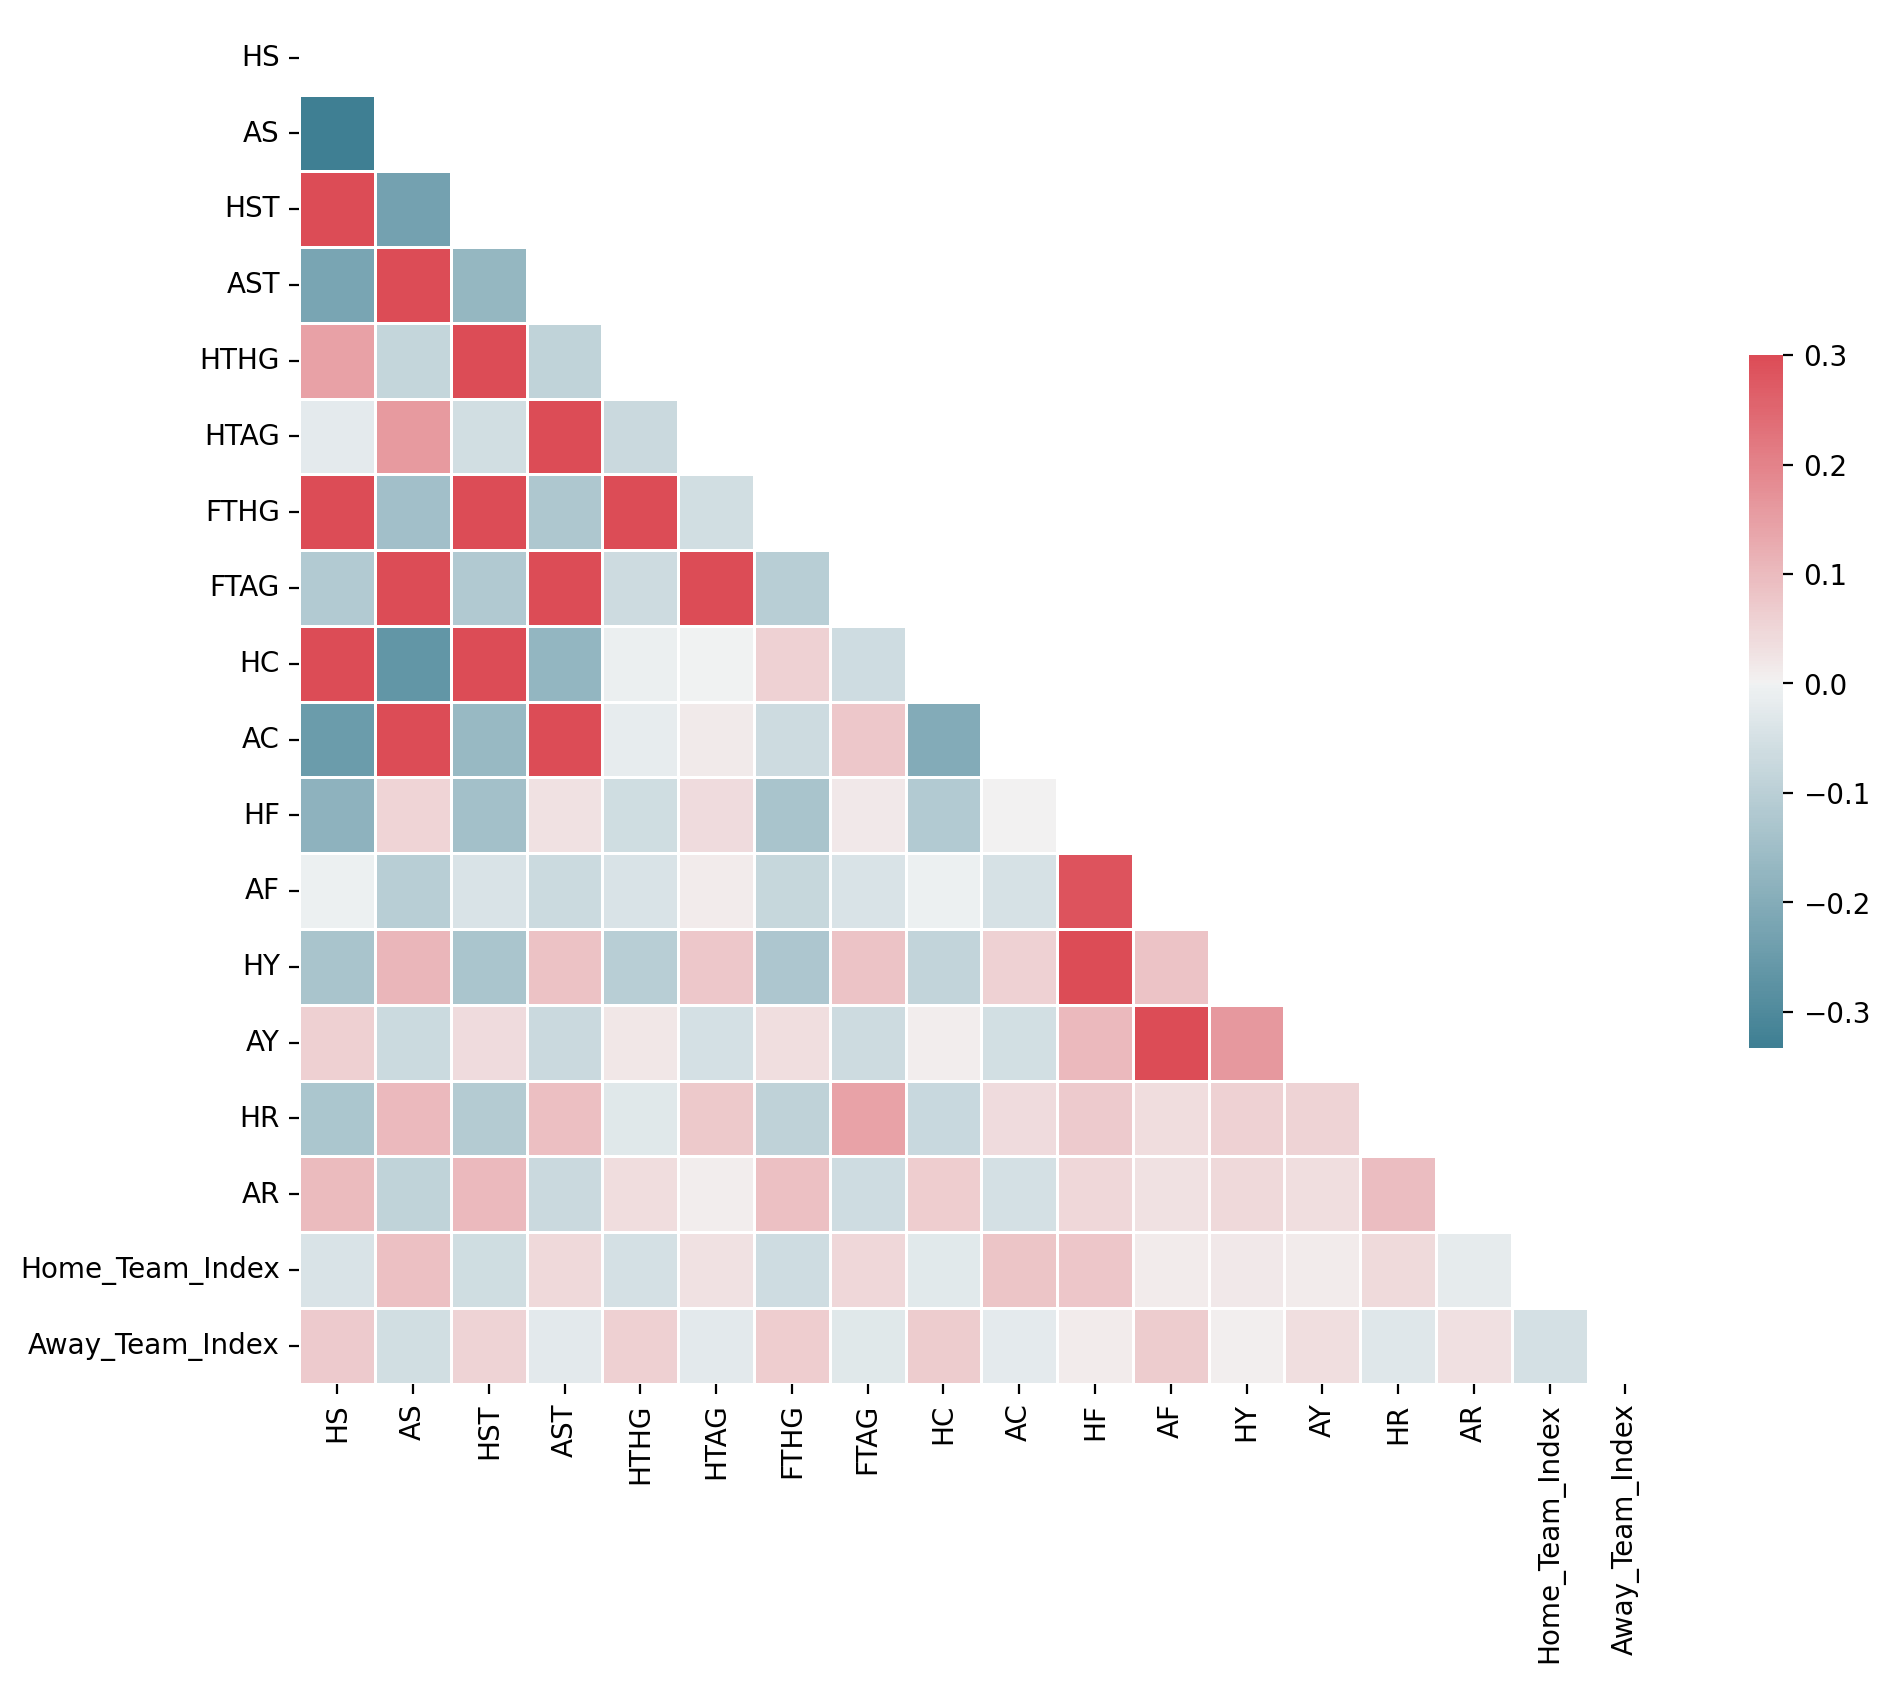

In [15]:

#correlation matrix
corr_matrix = df.corr()

#generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#draw heatmap with mask and correct aspect ratio
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

# Encoding

In [16]:
di = {"H": 3, "D": 1,'A':0}

In [17]:
df['FTR']=df['FTR'].map(di) 

/var/folders/tz/3wl_wg3n291_ymhlzngnlnzr0000gn/T/ipykernel_24245/3676477913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FTR']=df['FTR'].map(di)


In [18]:
data=df

In [19]:
data

,Date,HomeTeam,AwayTeam,HS,AS,HST,AST,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HY,AY,HR,AR,Home_Team_Index,Away_Team_Index
0,7/8/09,Wolfsburg,Stuttgart,13,14,7,4,0,0,D,...,6,3,12,12,0,0,0,0,27,25
1,8/8/09,Dortmund,FC Koln,24,7,11,0,0,0,D,...,16,1,8,10,0,1,0,0,5,7
2,8/8/09,Hertha,Hannover,10,15,4,3,0,0,D,...,5,3,16,20,3,2,0,0,13,12
3,8/8/09,Hoffenheim,Bayern Munich,9,9,1,3,1,1,D,...,3,10,10,28,0,2,0,0,14,1
4,8/8/09,Mainz,Leverkusen,8,13,4,7,1,2,A,...,3,5,22,28,1,2,0,0,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,18/5/19,Mainz,Hoffenheim,22,19,12,7,0,2,A,...,8,5,17,9,2,4,0,1,19,14
3056,18/5/19,M'gladbach,Dortmund,7,12,0,3,0,1,A,...,2,2,8,6,1,1,0,0,18,5
3057,18/5/19,Schalke 04,Stuttgart,12,16,3,8,0,0,D,...,7,5,10,8,0,1,0,0,23,25
3058,18/5/19,Werder Bremen,RB Leipzig,6,10,3,3,1,0,H,...,3,9,16,12,2,2,0,0,26,22


In [20]:

input_filter = ['Home_Team_Index', 'Away_Team_Index', 'HTHG', 'HTAG', 'HS',
                'AS', 'HST', 'AST', 'HR', 'AR']
output_filter = ['FTR']

cols_to_consider = input_filter + output_filter


# Deriving Clean Sheet
# htg_df = data[['HTHG', 'HTAG']]
# cs_data = derive_clean_sheet(htg_df)
# cs_df = pd.DataFrame(cs_data, columns=['HTCS', 'ATCS'])

# data = pd.concat([data, cs_df], axis=1)

data = data[cols_to_consider]

print(data[data.isna().any(axis=1)])
data = data.dropna(axis=0)

# Training & Testing

X = data[input_filter]
Y = data['FTR']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

svc_classifier = SVC(random_state=100, kernel='rbf')
lr_classifier = LogisticRegression(multi_class='ovr', max_iter=500)
nbClassifier = GaussianNB()
dtClassifier = DecisionTreeClassifier()
rfClassifier = RandomForestClassifier()

Empty DataFrame
Columns: [Home_Team_Index, Away_Team_Index, HTHG, HTAG, HS, AS, HST, AST, HR, AR, FTR]
Index: []


# MODEL BUILDING

In [21]:
#declare independent and dependent variables, and remove categoric variables

#declare training splits
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

#standardize the variables using regularization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#data/use softmax regression with ridge regression instead of lasso (because dependent variable has 3 possibilities)
softmax_reg = LogisticRegression(random_state=0, multi_class="multinomial", solver="saga", penalty = 'l2', C = 0.1)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial', random_state=0,
                   solver='saga')

In [22]:
#create a prediction of y values based on model
y_pred = softmax_reg.predict(X_test)

In [23]:
#find model accuracy from test data
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.6633986928104575


(array([197.,   0.,   0.,  84.,   0.,   0.,   0.,   0.,   0., 331.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

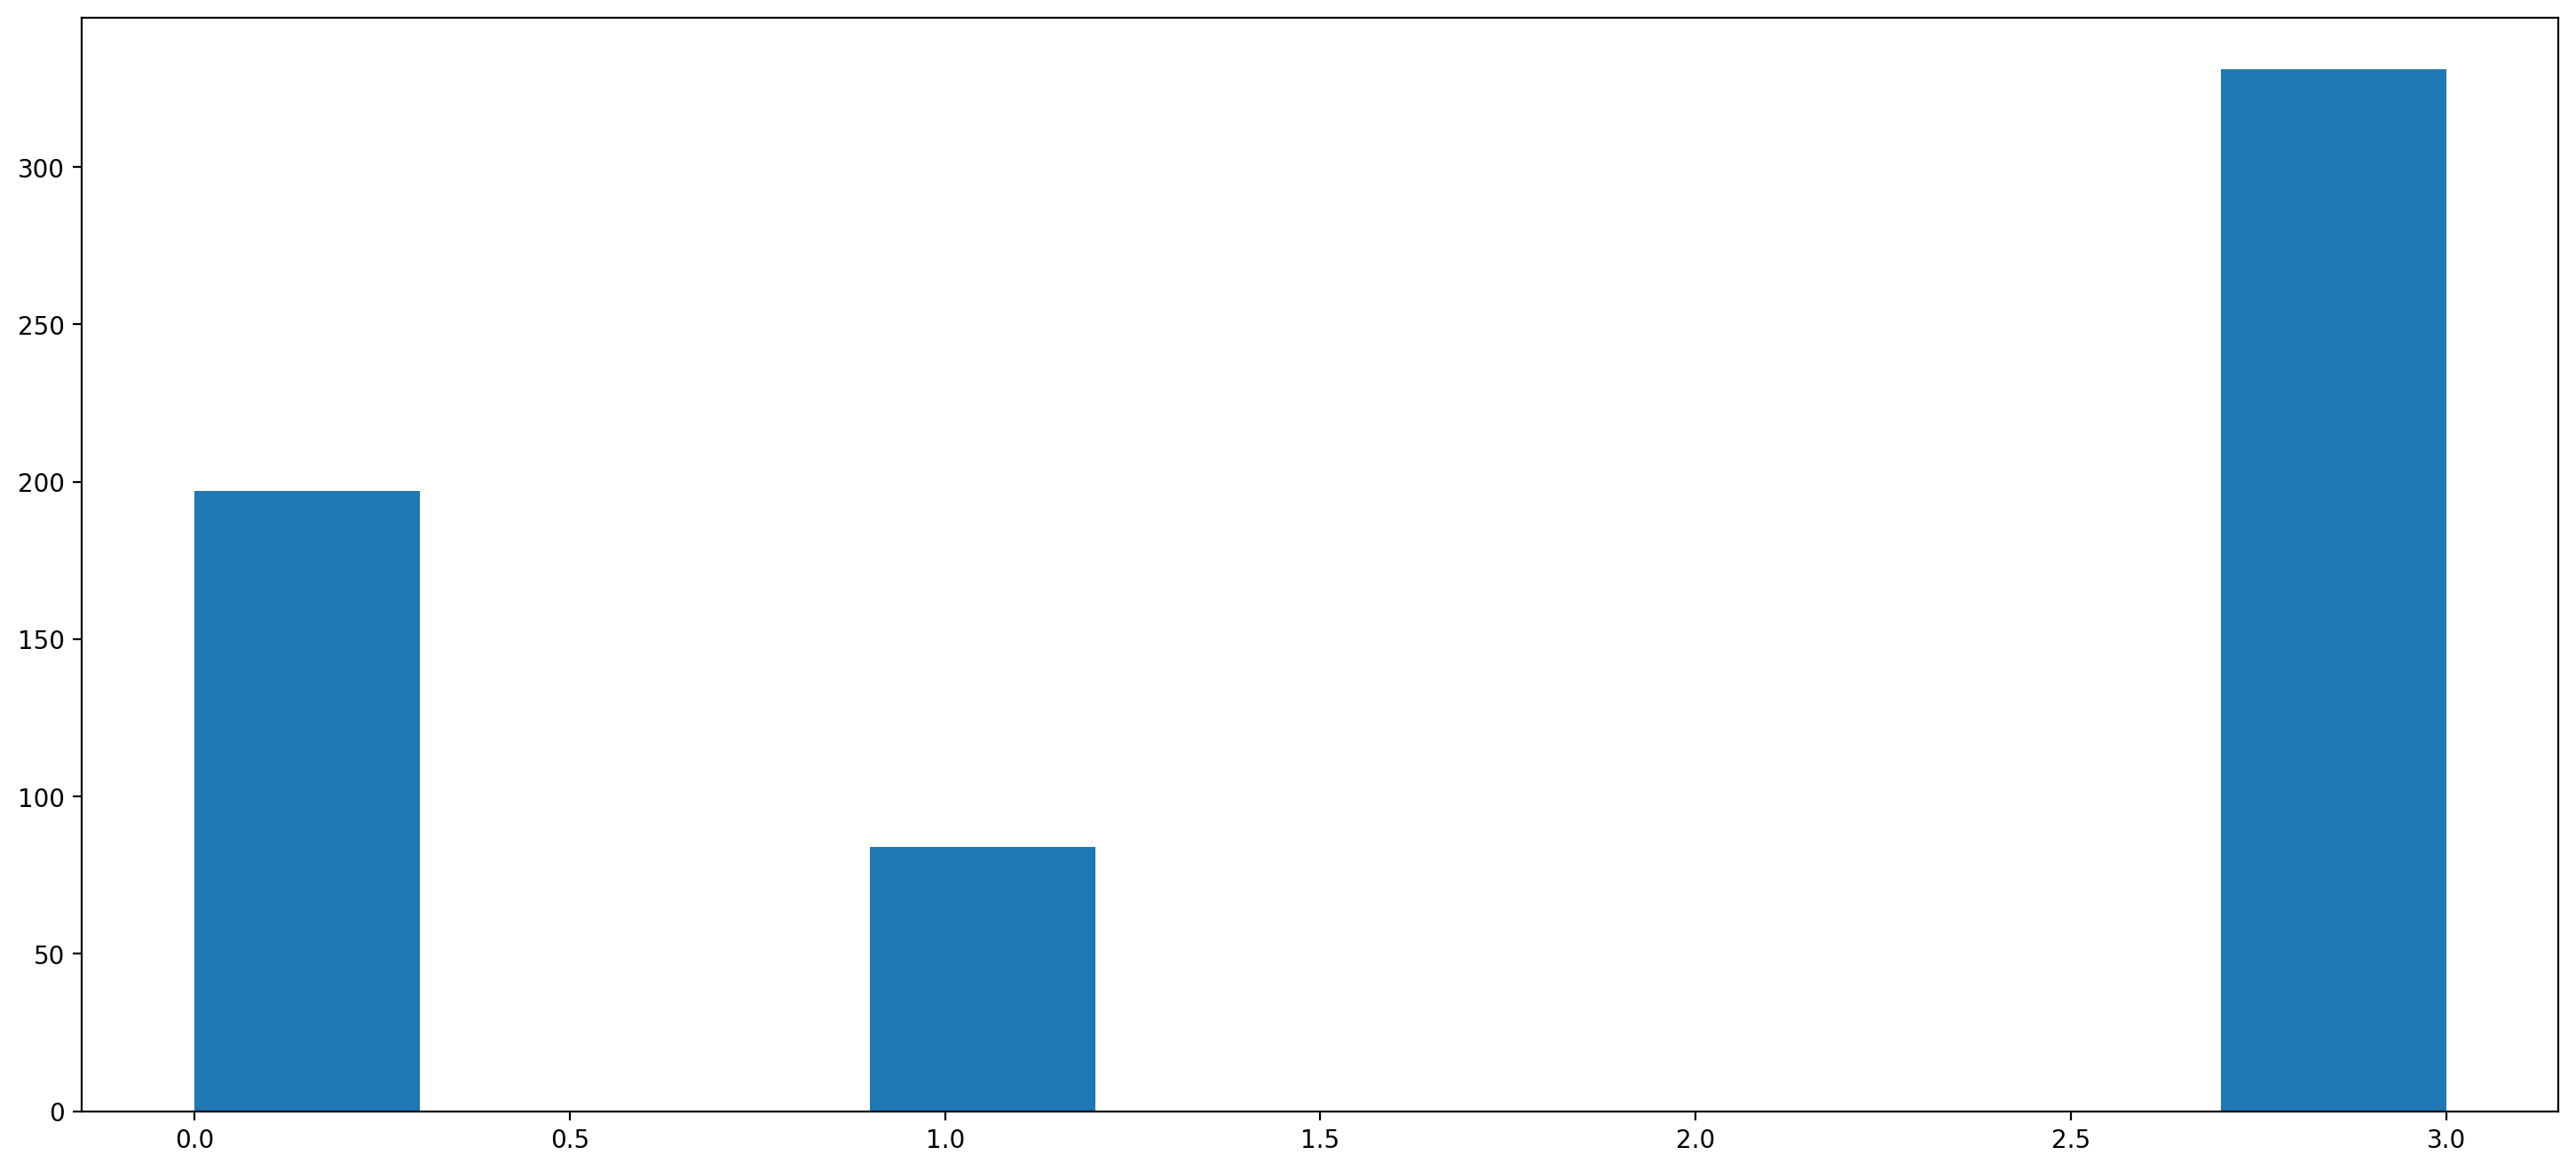

In [24]:
#plot predicted data
plt.hist(y_pred)

In [25]:
#find the worst possible accuracy
baseline_acc = len(Y[Y == 0]) / len(Y) 
print(baseline_acc)

0.3006535947712418


In [26]:
#fidn cohens score; higher score represents less randomness in dataset out of 1
cohens_score = cohen_kappa_score(y_test, y_pred)
print(cohens_score)

0.45983881540893845


In [27]:
print(softmax_reg.coef_)

[[-0.01746587 -0.05271665 -0.76301386  0.67589244  0.10835592 -0.13410304
  -0.522756    0.67319407  0.21220437 -0.22017729]
 [ 0.02738817  0.01085368 -0.06386056  0.02815216  0.07047845 -0.0177026
  -0.15905841 -0.11727277  0.03155856  0.07229527]
 [-0.0099223   0.04186297  0.82687442 -0.70404461 -0.17883436  0.15180564
   0.6818144  -0.55592129 -0.24376293  0.14788202]]


([<matplotlib.axis.XTick at 0x7ff220c5e2b0>,
 [Text(0, 0, 'Home_Team_Index'),
  Text(1, 0, 'Away_Team_Index'),
  Text(2, 0, 'HTHG'),
  Text(3, 0, 'HTAG'),
  Text(4, 0, 'HS'),
  Text(5, 0, 'AS'),
  Text(6, 0, 'HST'),
  Text(7, 0, 'AST'),
  Text(8, 0, 'HR'),
  Text(9, 0, 'AR')])

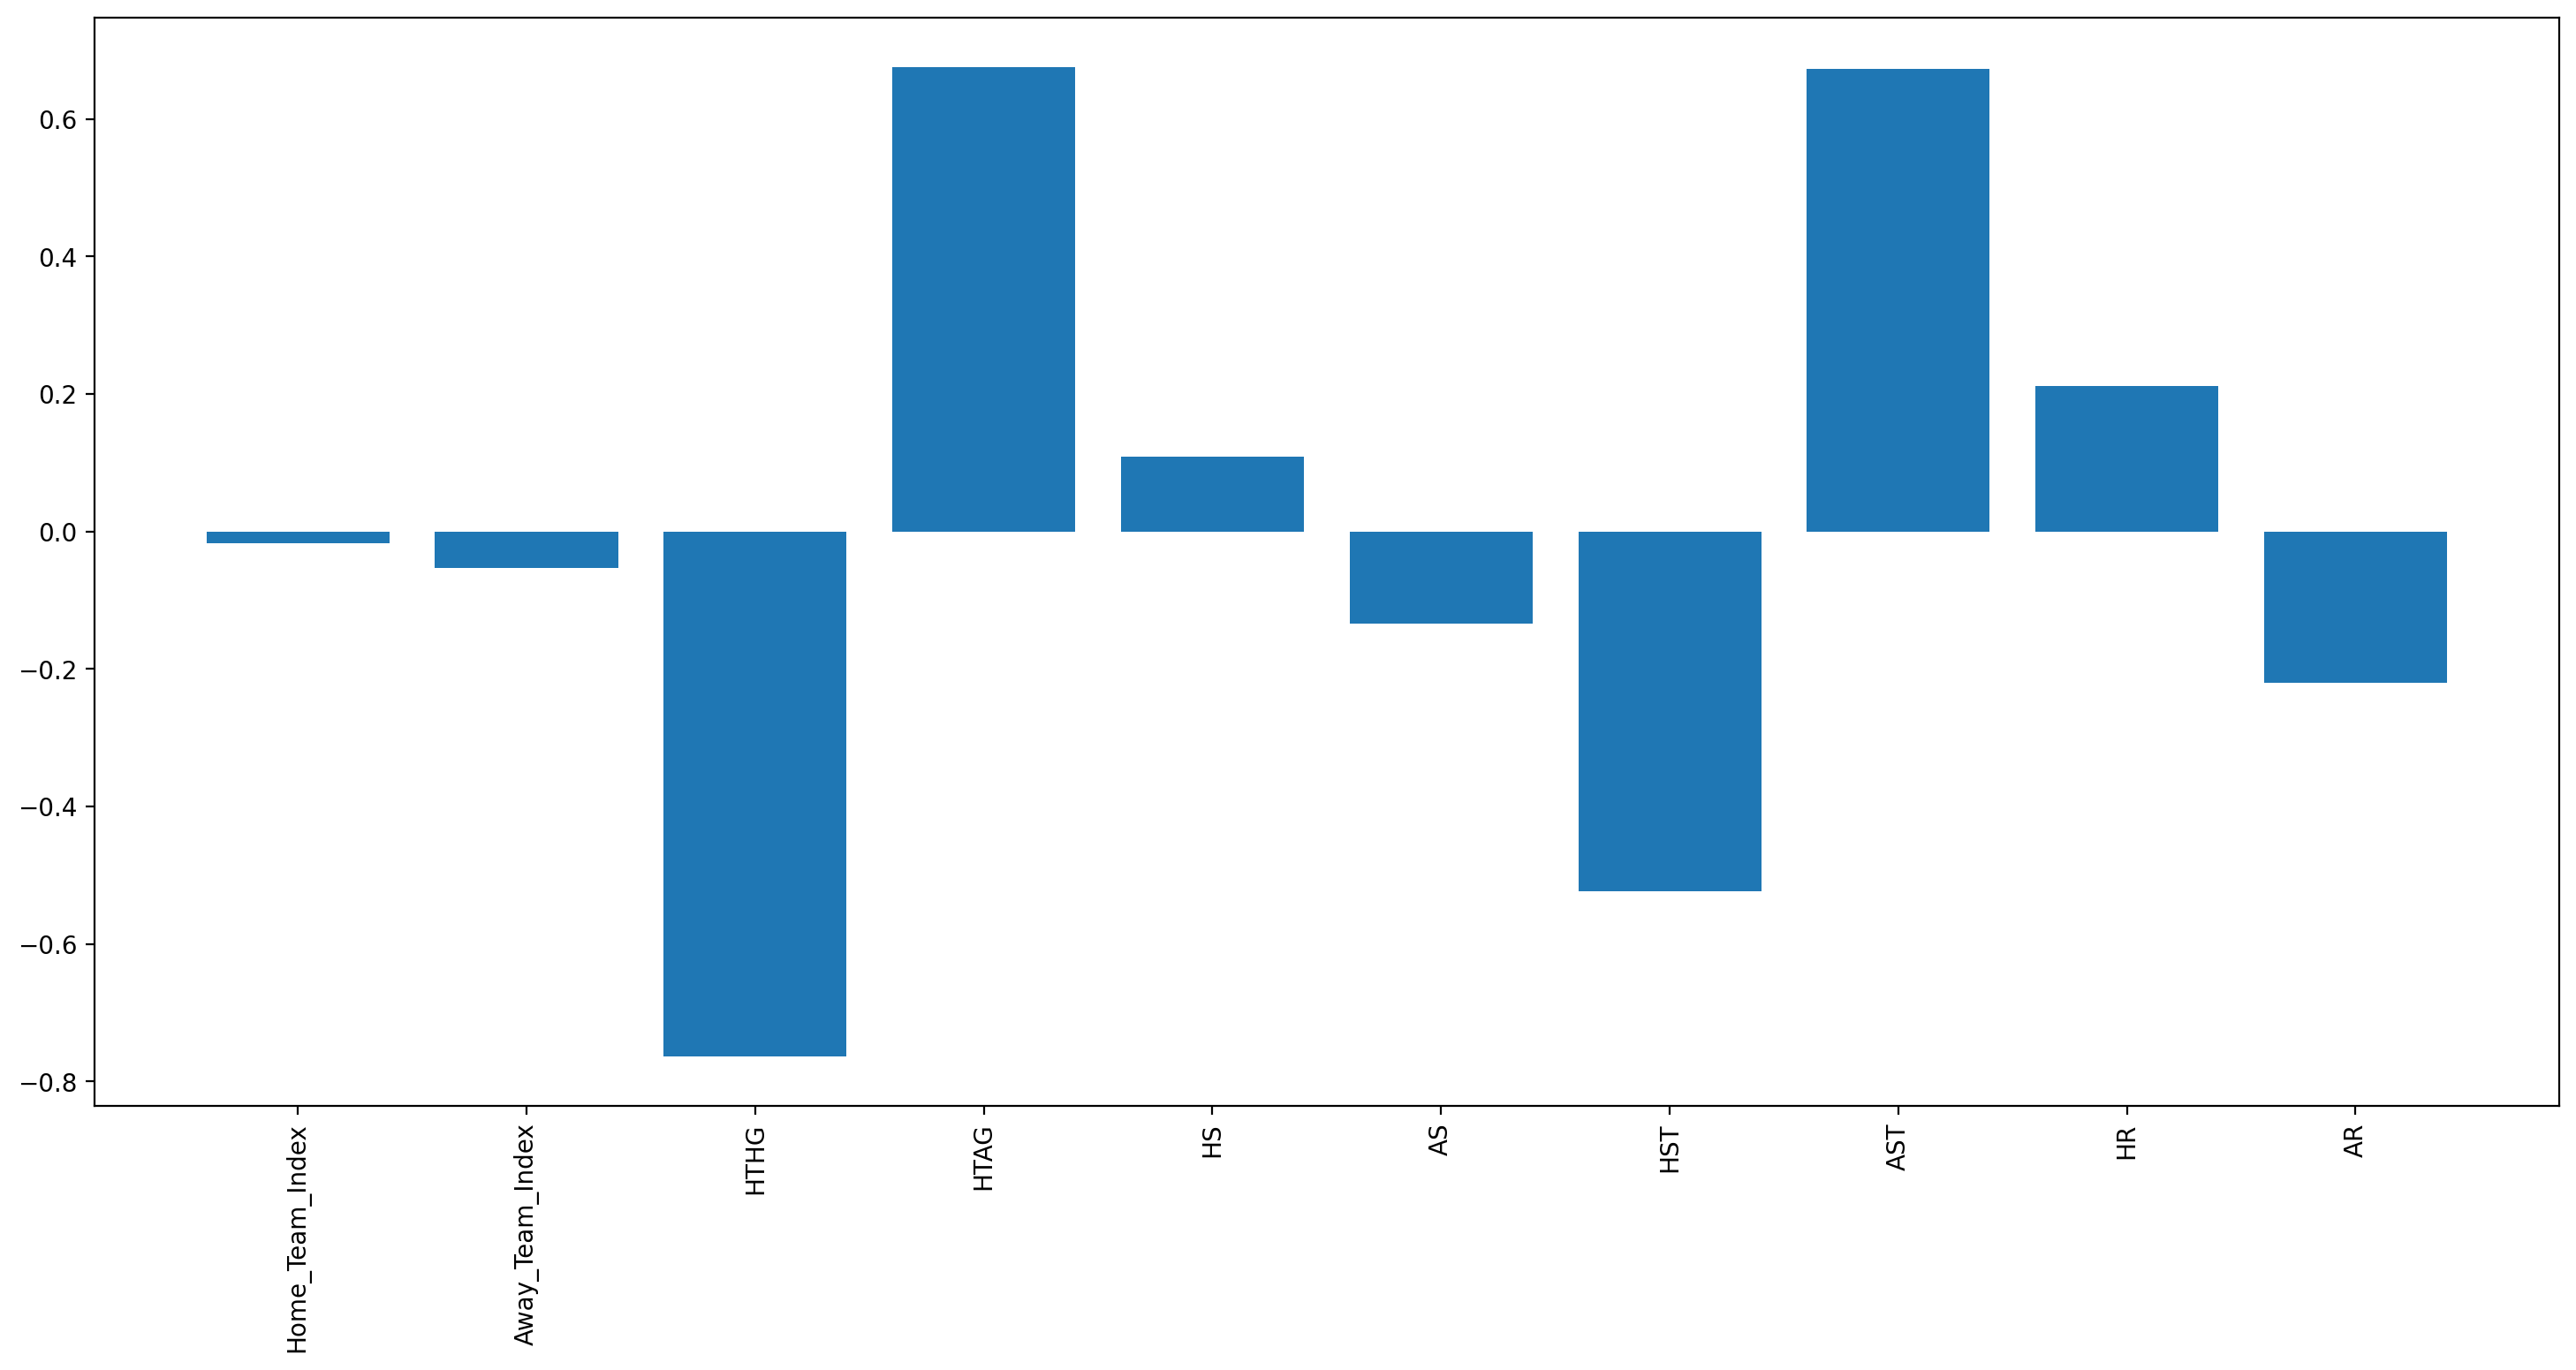

In [28]:
#create a feature importance bar chart using ridge regression
softmax_importance = range(0, softmax_reg.coef_.shape[1])
plt.bar(x = softmax_importance, height = softmax_reg.coef_[0])
plt.xticks(softmax_importance, X.columns, rotation=90)

In [29]:
#use random forest now to do the same thing as logistic regressionl, see if there are any imporvements
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
baseline_acc = len(Y[Y == 0]) / len(Y) 
cohens_score = cohen_kappa_score(y_test, y_pred)
print(acc_score, baseline_acc, cohens_score)

0.6111111111111112 0.3006535947712418 0.3835606002894798


In [30]:
rand_forest.feature_importances_

array([0.12832165, 0.12865671, 0.1168791 , 0.1009354 , 0.12359024,
       0.1190672 , 0.12698157, 0.12355625, 0.01776729, 0.0142446 ])

([<matplotlib.axis.XTick at 0x7ff220935d00>,
 [Text(0, 0, 'Home_Team_Index'),
  Text(1, 0, 'Away_Team_Index'),
  Text(2, 0, 'HTHG'),
  Text(3, 0, 'HTAG'),
  Text(4, 0, 'HS'),
  Text(5, 0, 'AS'),
  Text(6, 0, 'HST'),
  Text(7, 0, 'AST'),
  Text(8, 0, 'HR'),
  Text(9, 0, 'AR')])

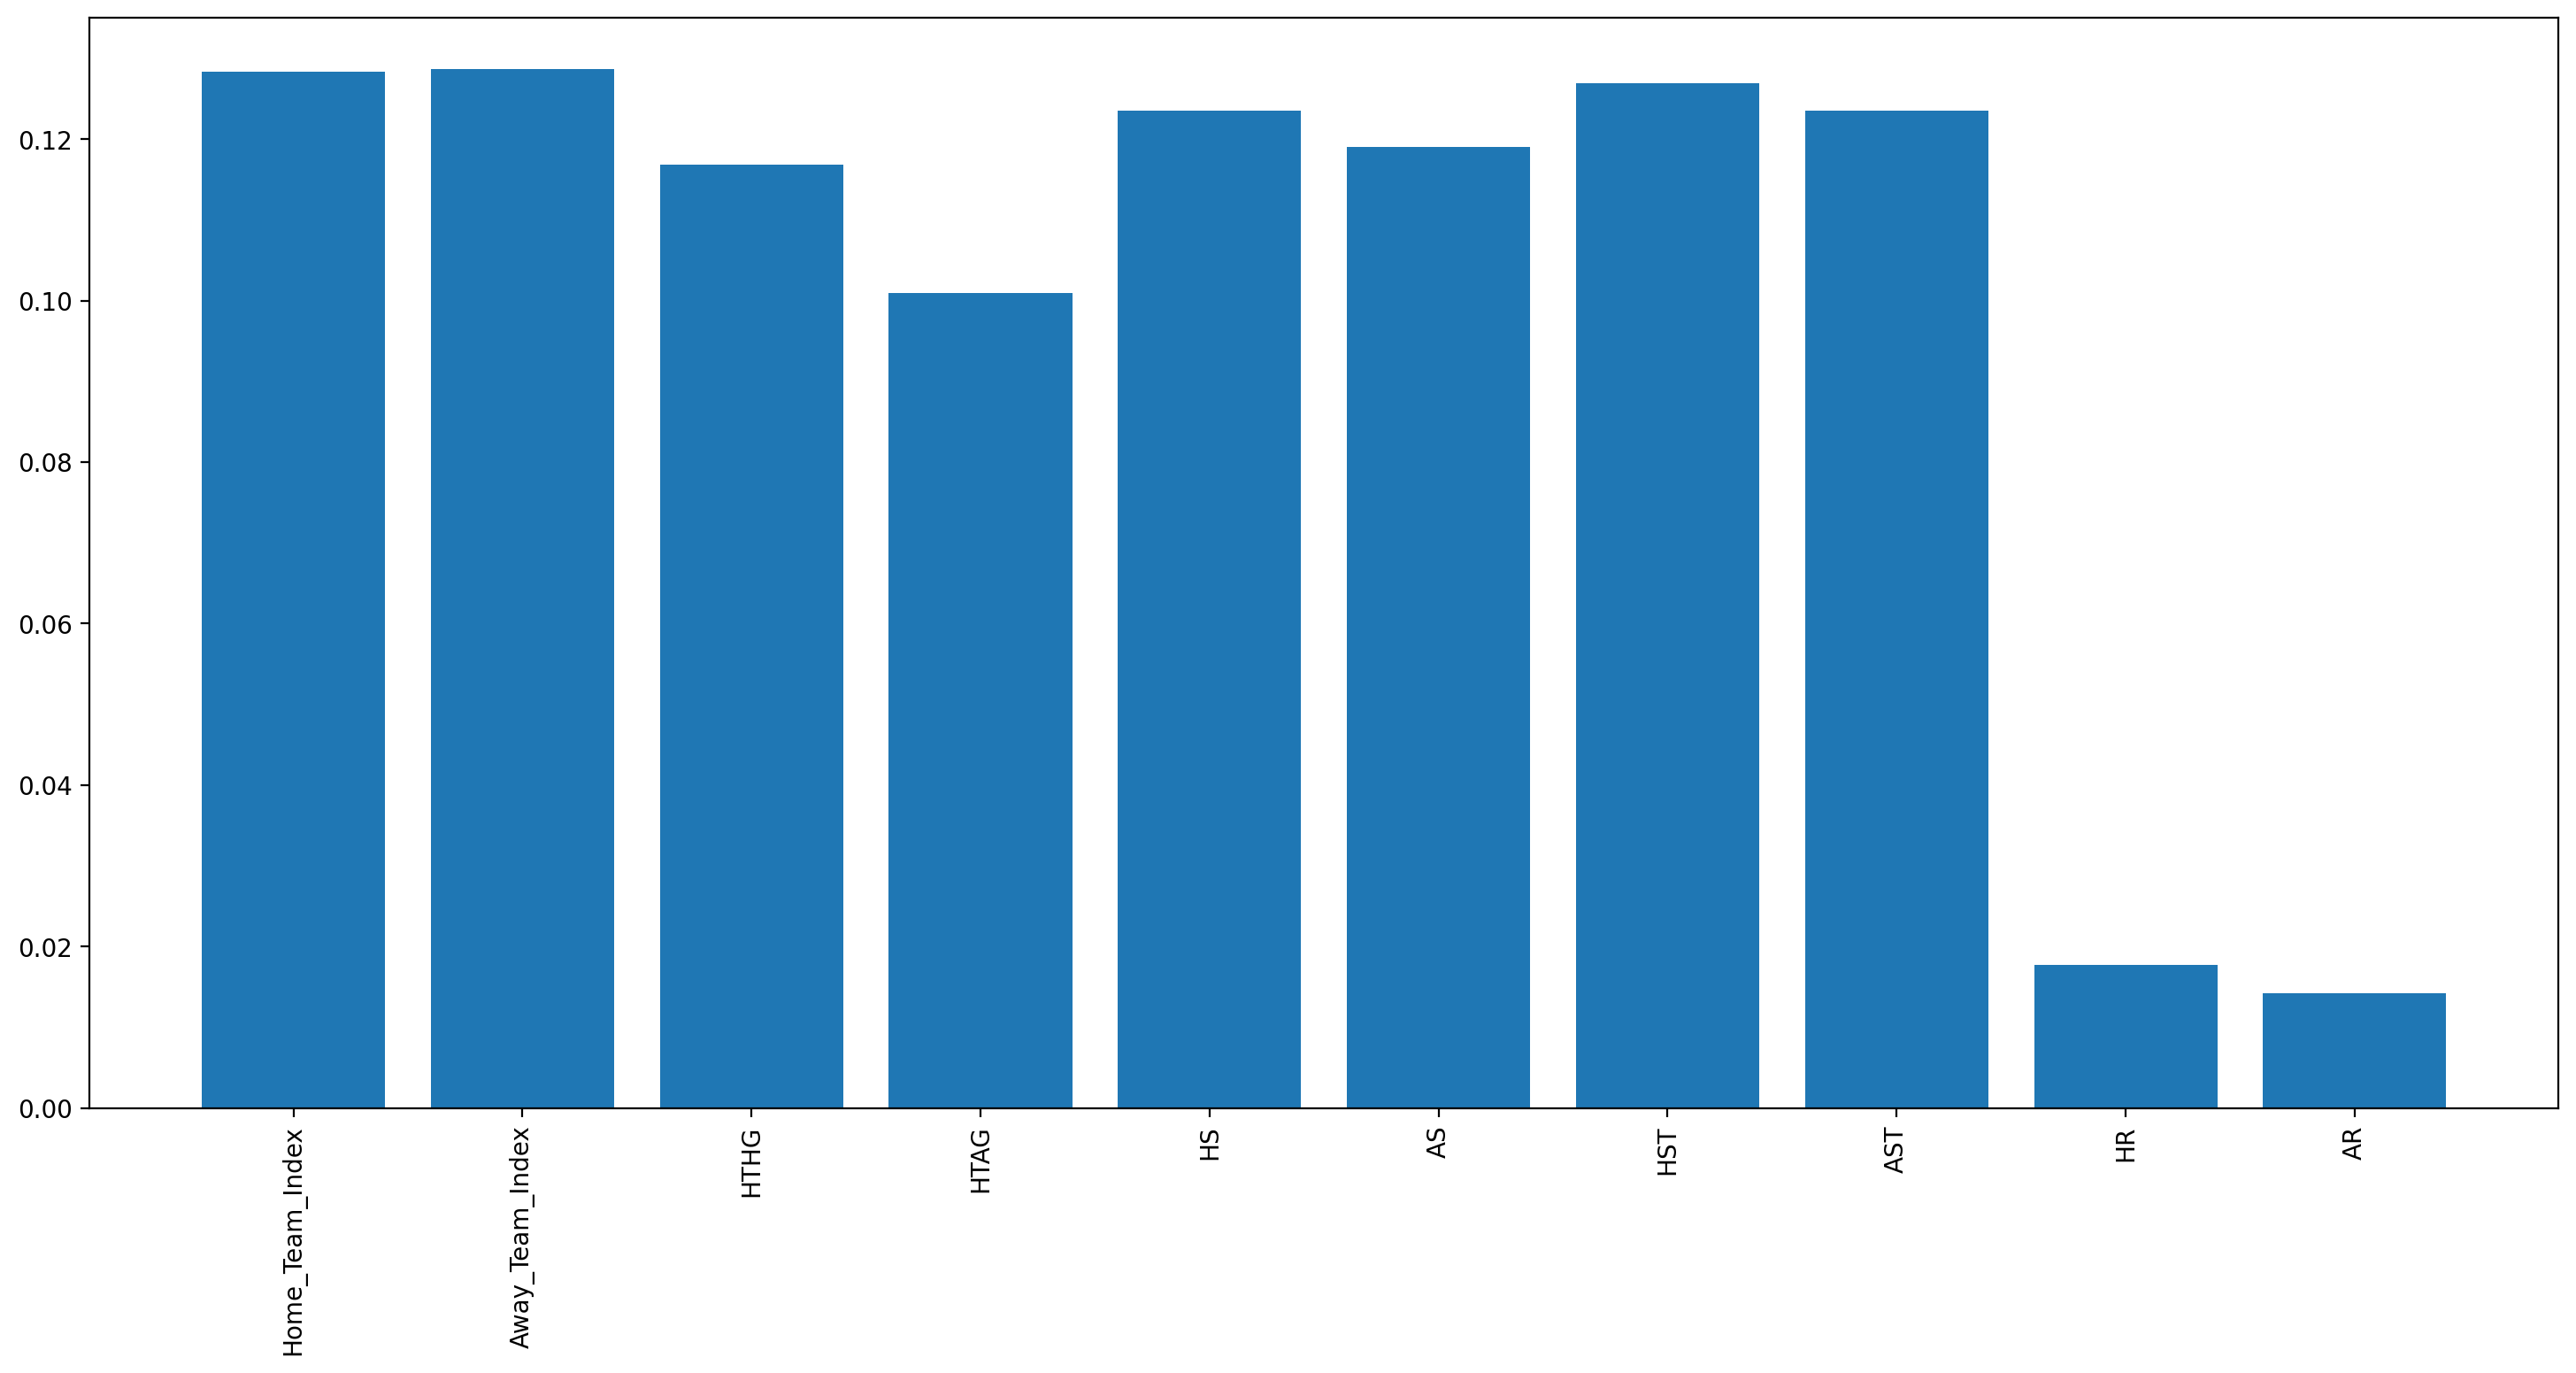

In [31]:
#create a feature importance bar chart
rand_forest_importance = range(0, len(rand_forest.feature_importances_))
plt.bar(x = rand_forest_importance, height = rand_forest.feature_importances_)
plt.xticks(rand_forest_importance, X.columns, rotation=90)

# xgboost

In [32]:
from xgboost import XGBClassifier

In [34]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [0 1 3]

# Support Vector Machine

In [35]:
svc_classifier = SVC(random_state=100, kernel='rbf')
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.6454248366013072


# Naive Bias

In [36]:


nbClassifier = GaussianNB()

In [37]:
nbClassifier = GaussianNB()
nbClassifier.fit(X_train, y_train)
y_pred = nbClassifier.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.6241830065359477


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6980392156862745
0.6372549019607843


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7254901960784313
0.6431372549019608
0.6627450980392157
0.6627450980392157


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


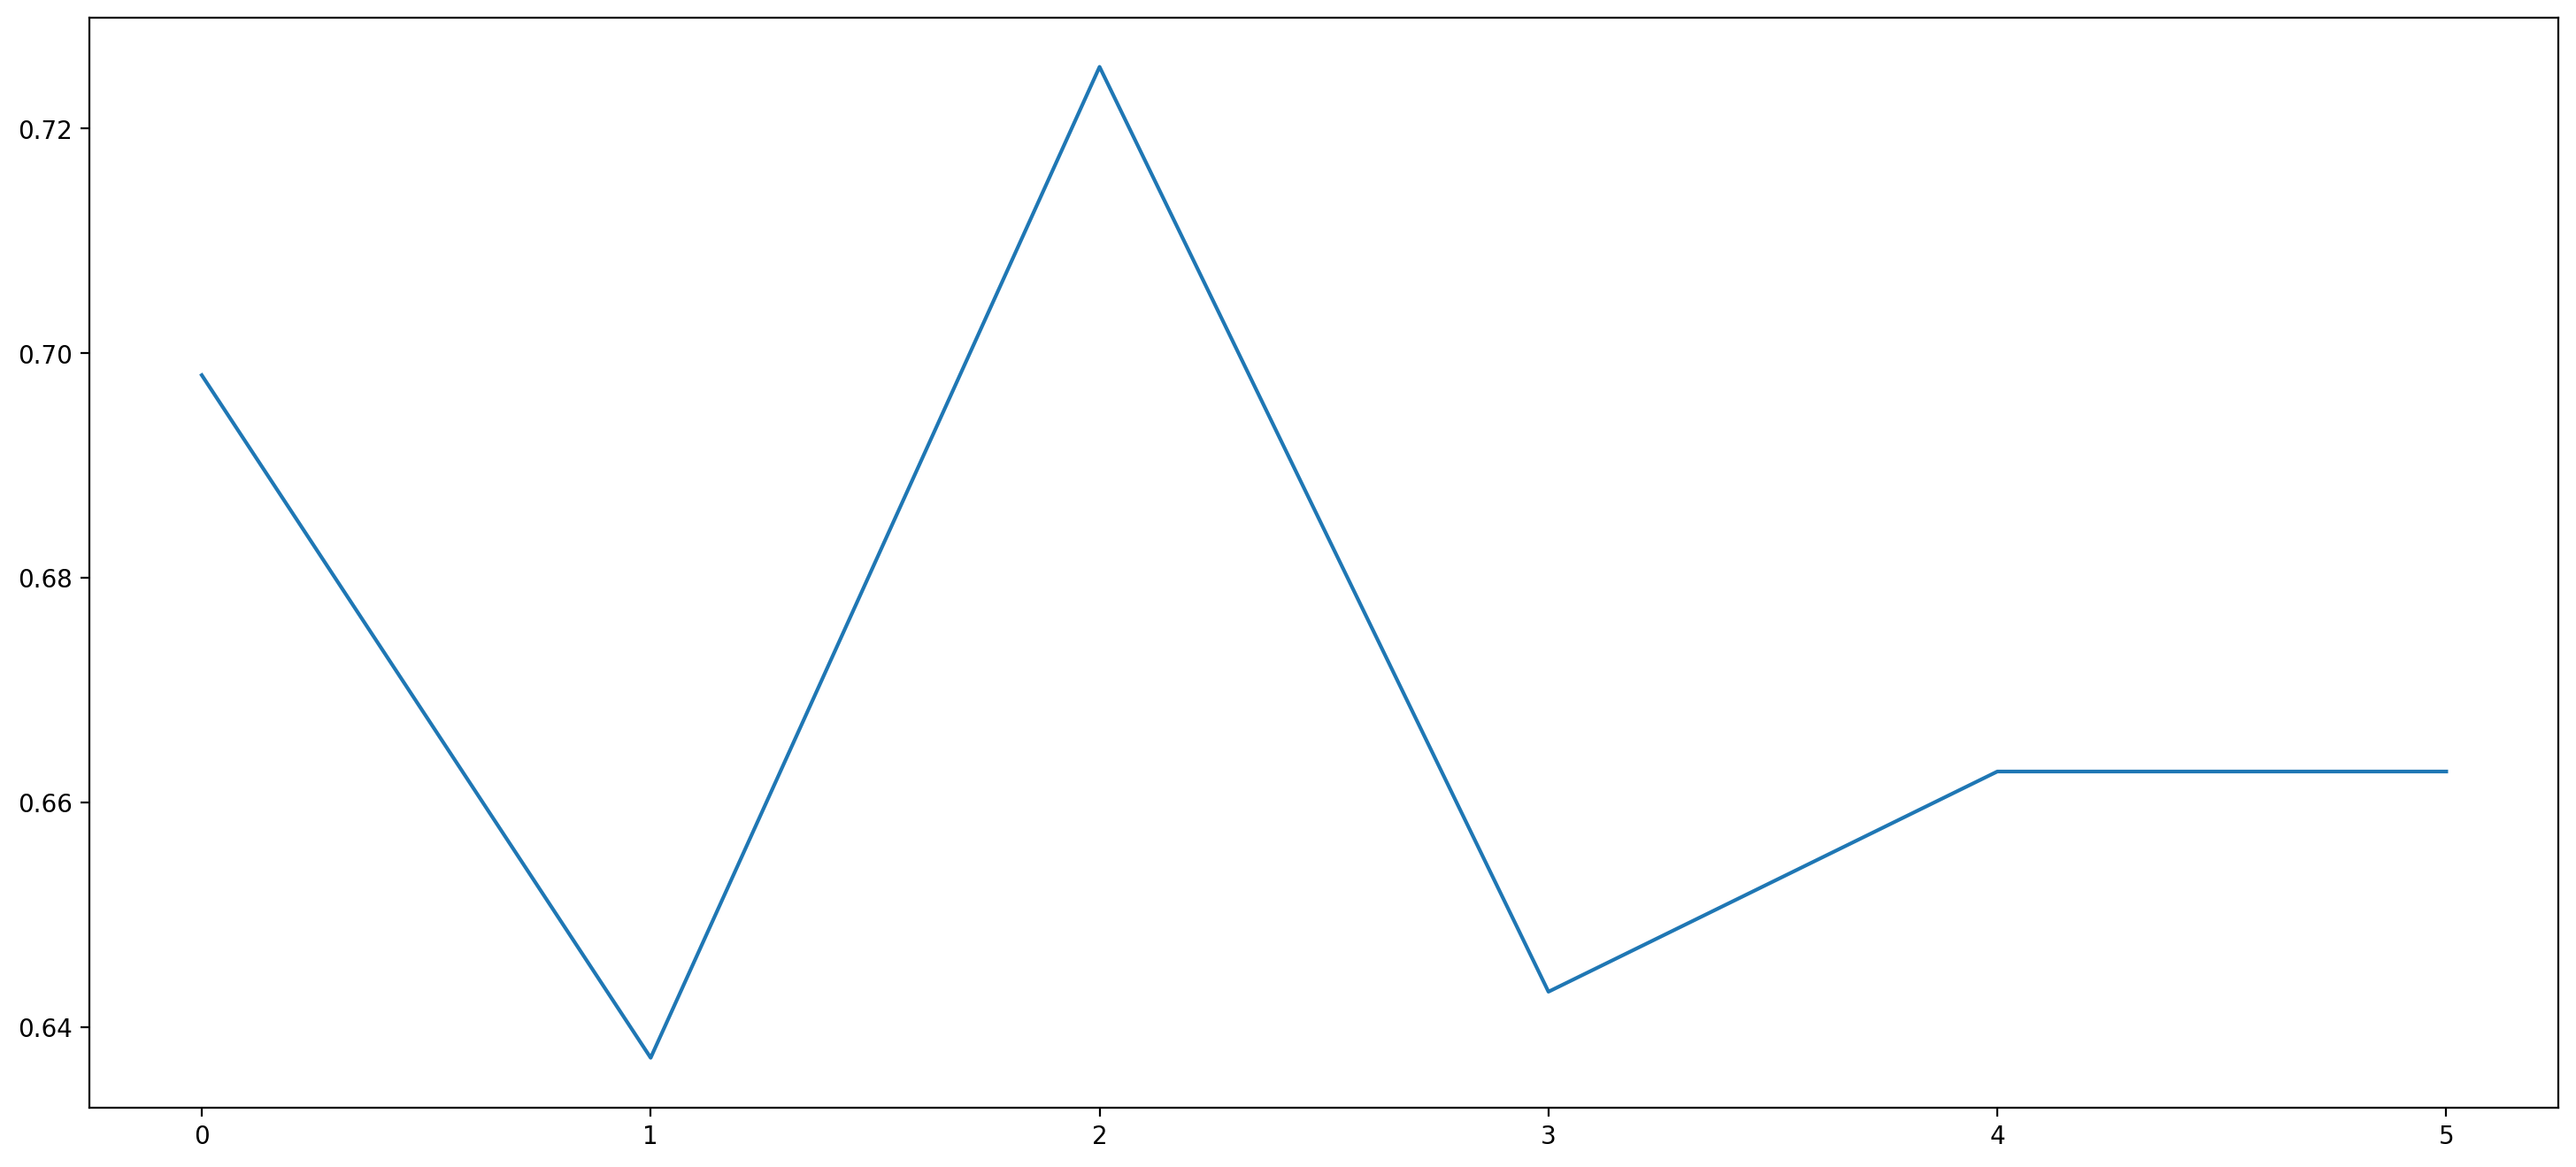

In [38]:
#use K-folds for cross-validation on the random forest model
fold_perf = []

kf = KFold(n_splits=6, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    softmax_reg = LogisticRegression(random_state=0, multi_class="multinomial", solver="saga", penalty = 'l2', C = 0.1)
    softmax_reg.fit(X_train, y_train)
    y_pred = softmax_reg.predict(X_test)
    

    acc_score = accuracy_score(y_test, y_pred)
    fold_perf.append(acc_score)
    print(acc_score)

plt.plot(fold_perf)

In [39]:
#Used the random forest to predict points for every team at the end of a new season
np.set_printoptions(threshold=np.inf)
model_predictions = softmax_reg.predict(X_test)
i = 1
predicted = model_predictions.tolist()
actual = y_test.tolist()
print(predicted)


[3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 3, 3, 1, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 3, 1, 3, 0, 1, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 0, 3, 3, 3, 1, 1, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 1, 0, 0, 1, 0, 3, 3, 0, 1, 1, 0, 3, 3, 0, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 0, 0, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 3, 3, 3, 3, 0, 0, 3, 1, 0, 3, 3, 0, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 1, 0, 3, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0, 1, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 3, 1, 3, 0, 3, 3, 3, 0, 3, 1, 3, 3, 3, 1, 3, 1, 0, 3, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 3, 0, 1, 1, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 0, 

# Prediction

In [40]:
predicted_df = X_test
predicted_df['Points'] = predicted
predicted_df.head()

/var/folders/tz/3wl_wg3n291_ymhlzngnlnzr0000gn/T/ipykernel_24245/828137986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_df['Points'] = predicted


,Home_Team_Index,Away_Team_Index,HTHG,HTAG,HS,AS,HST,AST,HR,AR,Points
0,27,25,0,0,13,14,7,4,0,0,3
6,26,6,2,2,22,15,10,8,1,0,0
9,1,26,0,1,9,10,4,1,0,0,1
11,7,27,0,0,13,20,6,9,0,0,0
17,23,2,2,0,18,11,6,2,0,0,3


In [41]:
predicted_df

,Home_Team_Index,Away_Team_Index,HTHG,HTAG,HS,AS,HST,AST,HR,AR,Points
0,27,25,0,0,13,14,7,4,0,0,3
6,26,6,2,2,22,15,10,8,1,0,0
9,1,26,0,1,9,10,4,1,0,0,1
11,7,27,0,0,13,20,6,9,0,0,0
17,23,2,2,0,18,11,6,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3051,1,6,1,0,23,6,14,2,0,0,3
3053,9,20,2,0,18,14,8,5,0,0,3
3055,19,14,0,2,22,19,12,7,0,1,0
3056,18,5,0,1,7,12,0,3,0,0,0


In [42]:
print(type(index))
print(index.columns)



<class 'pandas.core.frame.DataFrame'>
Index(['Home_Team_Index', 'HomeTeam'], dtype='object')


In [43]:
predicted_df

,Home_Team_Index,Away_Team_Index,HTHG,HTAG,HS,AS,HST,AST,HR,AR,Points
0,27,25,0,0,13,14,7,4,0,0,3
6,26,6,2,2,22,15,10,8,1,0,0
9,1,26,0,1,9,10,4,1,0,0,1
11,7,27,0,0,13,20,6,9,0,0,0
17,23,2,2,0,18,11,6,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3051,1,6,1,0,23,6,14,2,0,0,3
3053,9,20,2,0,18,14,8,5,0,0,3
3055,19,14,0,2,22,19,12,7,0,1,0
3056,18,5,0,1,7,12,0,3,0,0,0


In [44]:
#sum the points
cleaned_prediction = psql.sqldf("SELECT Home_Team_Index, SUM(Points) as Standing FROM predicted_df GROUP BY Home_Team_Index ORDER BY Standing DESC")
print(cleaned_prediction)

    Home_Team_Index  Standing
0                 5        95
1                 1        91
2                17        63
3                23        60
4                14        59
5                18        50
6                 0        48
7                27        47
8                26        45
9                12        39
10                9        35
11               11        34
12               13        33
13                7        31
14                6        29
15               20        28
16               19        28
17               25        22
18               22        15
19               15         7
20               24         6
21                8         6
22                3         6
23                4         5
24               16         3
25                2         3
26               21         0
27               10         0


In [45]:
#final predicions table
bindi = pd.DataFrame(index)
final_prediction = psql.sqldf("SELECT b.HomeTeam, Standing FROM cleaned_prediction c LEFT OUTER JOIN bindi b ON c.Home_Team_Index = b.Home_Team_Index ORDER BY Standing DESC")
print(final_prediction)

              HomeTeam  Standing
0             Dortmund        95
1        Bayern Munich        91
2           Leverkusen        63
3           Schalke 04        60
4           Hoffenheim        59
5           M'gladbach        50
6             Augsburg        48
7            Wolfsburg        47
8        Werder Bremen        45
9             Hannover        39
10            Freiburg        35
11             Hamburg        34
12              Hertha        33
13             FC Koln        31
14       Ein Frankfurt        29
15            Nurnberg        28
16               Mainz        28
17           Stuttgart        22
18          RB Leipzig        15
19          Ingolstadt         7
20            St Pauli         6
21  Fortuna Dusseldorf         6
22        Braunschweig         6
23           Darmstadt         5
24      Kaiserslautern         3
25              Bochum         3
26           Paderborn         0
27      Greuther Furth         0


The most points stands for  Bayern Munich 